In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
data=pd.read_excel('/Users/macbook/Desktop/MagicPin/data.xlsx')

Analysis

In [4]:
# Deriving insights from the EIR_Hometask data

# 1. Total number of unique users
total_users = data['USER_ID'].nunique()

# 2. Total number of transactions
total_transactions = data['TRANSACTION_ID'].nunique()

# 3. Average transaction amount
avg_transaction_amount = data['AMOUNT'].mean()

# 4. Total transaction volume by currency
transaction_volume_by_currency = data.groupby('CURRENCY')['AMOUNT'].sum()

# 5. Most common transaction type
transaction_type_counts = data['TYPE'].value_counts()
most_common_transaction_type = transaction_type_counts.idxmax()
# 6. Top Users by Transaction Amount
top_users_by_amount = data.groupby('USER_ID')['AMOUNT'].sum().sort_values(ascending=False).head(10)

# 7. Users with Only One Transaction
one_transaction_users = data['USER_ID'].value_counts()
one_transaction_users_count = (one_transaction_users == 1).sum()

insights = {
    "Total Users": total_users,
    "Total Transactions": total_transactions,
    "Average Transaction Amount": avg_transaction_amount,
    "Transaction Volume by Currency": transaction_volume_by_currency,
    "Most Common Transaction Type": most_common_transaction_type,
    "Top Users by Transaction Amount":top_users_by_amount,
    "Users with Only One Transaction":one_transaction_users_count
}

insights






{'Total Users': 1134,
 'Total Transactions': 10000,
 'Average Transaction Amount': 175.76825300000002,
 'Transaction Volume by Currency': CURRENCY
 EUR    852363.35
 GBP    905319.18
 Name: AMOUNT, dtype: float64,
 'Most Common Transaction Type': 'TOPUP',
 'Top Users by Transaction Amount': USER_ID
 06bb2d68-bf61-4030-8447-9de64d3ce490    22057.20
 d35f19f3-d9ad-48bf-bd1e-90f3ba4f0b98    18345.98
 d1bc3cd6-154e-479f-8957-a69cdf414462    16684.73
 65ac0928-e17d-4636-96f4-ebe6bdb9c98d    15261.73
 59d3efe9-135b-4b44-ac59-80a13da8109a    15083.93
 0fe472c9-cf3e-4e43-90f3-a0cfb6a4f1f0    14450.34
 20100a1d-12bc-41ed-a5e1-bc46216e9696    14291.30
 84e22e7f-f2ab-413c-969a-667c78d8885c    14098.60
 26e8432c-5fdb-4b67-82e6-18f341d511a1    11036.51
 6cae3eb6-515c-4811-8b51-32fb2e95da28    10937.53
 Name: AMOUNT, dtype: float64,
 'Users with Only One Transaction': 230}

In [5]:
# Set up style
sns.set_style("whitegrid")

# Create a PDF for saving plots
pdf_pages = PdfPages("/Users/macbook/Desktop/MagicPin/insights_graphs.pdf")

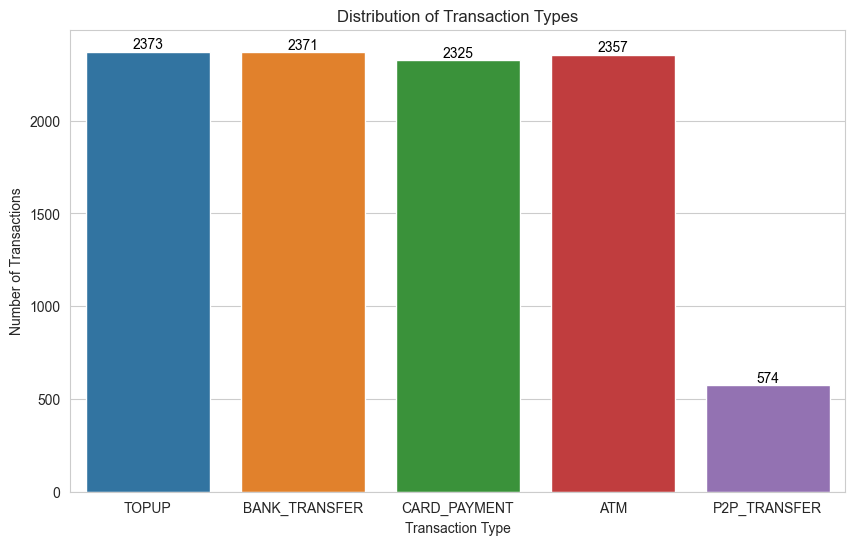

In [6]:
# 1. Distribution of Transaction Types
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=data, x='TYPE')
plt.title("Distribution of Transaction Types")
plt.ylabel("Number of Transactions")
plt.xlabel("Transaction Type")
# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0,5), textcoords='offset points')
pdf_pages.savefig()  # Save the current figure to the PDF
plt.show()

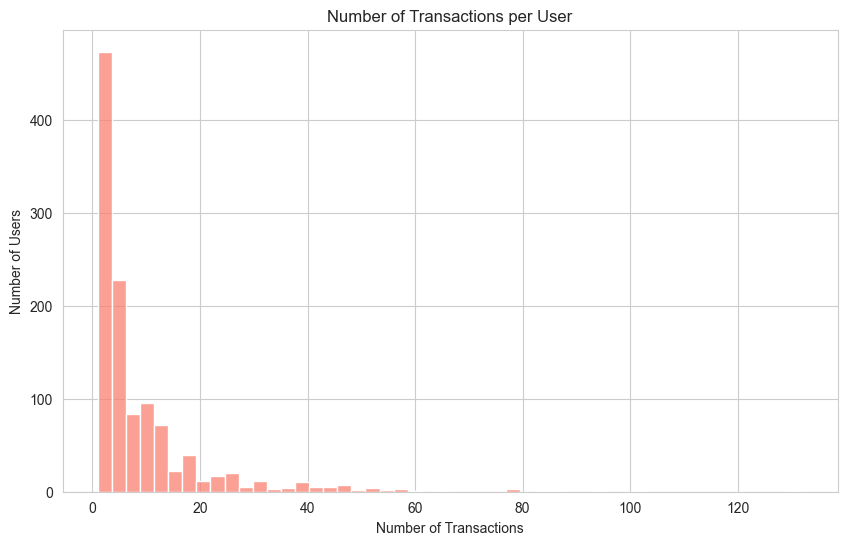

In [7]:
# 2. Calculate the number of transactions per user
transactions_per_user = data['USER_ID'].value_counts()

# Initialize the figure
plt.figure(figsize=(10, 6))

# Plot the distribution of transactions per user
sns.histplot(transactions_per_user, bins=50, color='salmon')

# Title and labels
plt.title('Number of Transactions per User')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Users')
pdf_pages.savefig()  # Save the current figure to the PDF
plt.show()



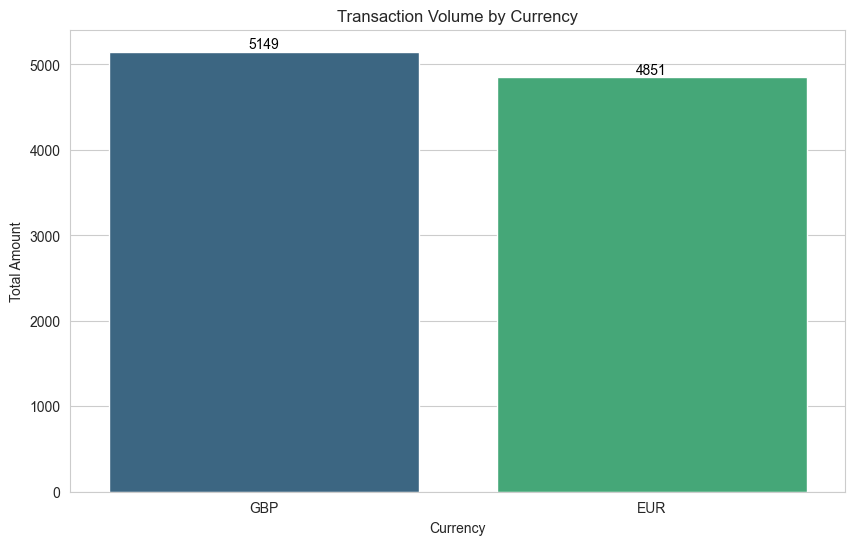

In [8]:
# 3. Transaction Volume by Currency
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='CURRENCY', order=data['CURRENCY'].value_counts().index, palette='viridis')
plt.title("Transaction Volume by Currency")
plt.ylabel("Total Amount")
plt.xlabel("Currency")
# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0,5), textcoords='offset points')
pdf_pages.savefig()  # Save the current figure to the PDF
plt.show()


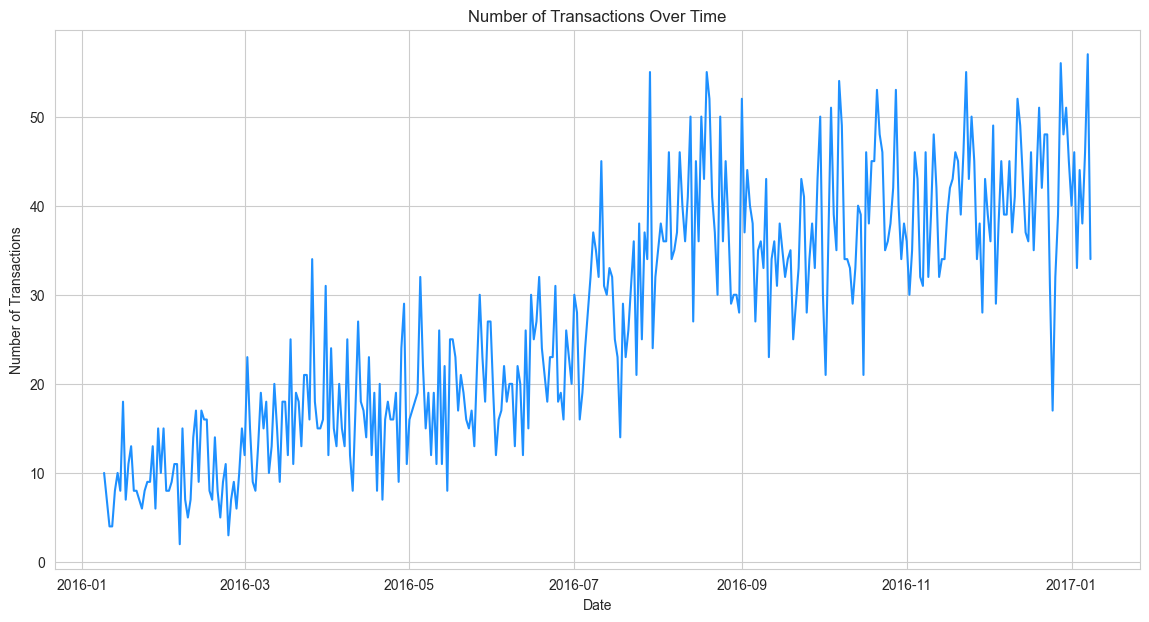

In [9]:
#4. Plot the number of transactions over time
# Extract the date from the CREATED_DATE column
data['DATE'] = data['CREATED_DATE'].dt.date

# Calculate the number of transactions per day
transactions_per_day = data.groupby('DATE').size()

# Initialize the figure
plt.figure(figsize=(14, 7))

# Plot the number of transactions over time
transactions_per_day.plot(color='dodgerblue')

# Title and labels
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
pdf_pages.savefig() 
plt.show()

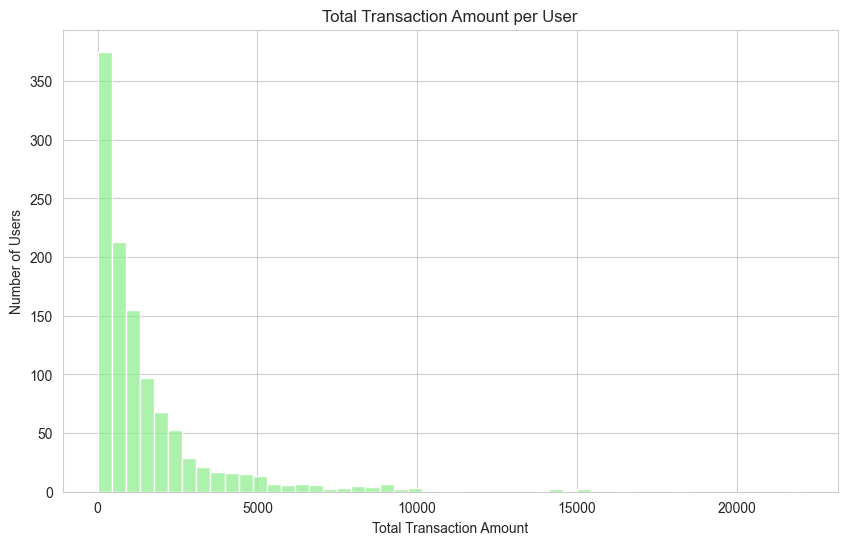

In [10]:
#5. Plot the distribution of total transaction amount per user
# Calculate the total transaction amount per user
total_amount_per_user = data.groupby('USER_ID')['AMOUNT'].sum()

# Initialize the figure
plt.figure(figsize=(10, 6))

# Plot the distribution of total transaction amount per user
sns.histplot(total_amount_per_user, bins=50, color='lightgreen')

# Title and labels
plt.title('Total Transaction Amount per User')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Number of Users')
pdf_pages.savefig() 
plt.show()


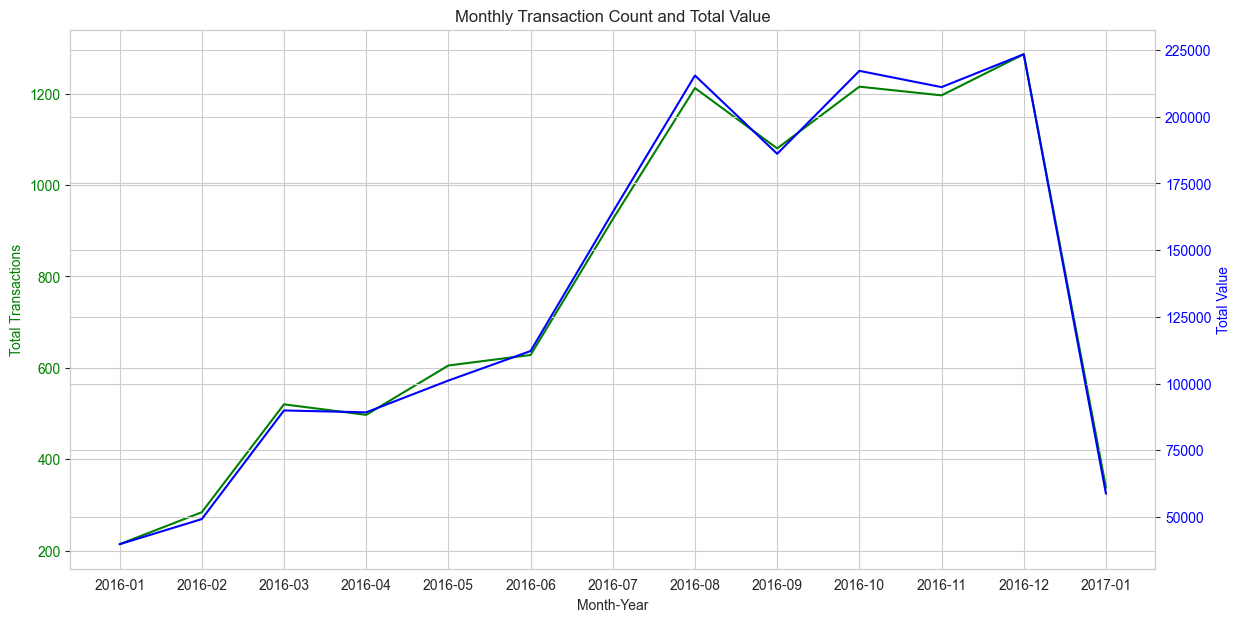

In [11]:
#6. Monthly Transaction Count and Total Value
# Extract month and year from 'CREATED_DATE' to create a new 'month_year' column
data['month_year'] = data['CREATED_DATE'].dt.to_period('M')

# Group by 'month_year' to get total number and value of transactions for each month-year
monthly_summary = data.groupby('month_year').agg(
    total_transactions=('TRANSACTION_ID', 'count'),
    total_value=('AMOUNT', 'sum')
).reset_index()

# Plotting the monthly transaction count and total value
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 7))

# Twin the axes for two different y-axes
ax2 = ax1.twinx()

# Plotting the total transactions
ax1.plot(monthly_summary['month_year'].astype(str), monthly_summary['total_transactions'], 'g-')
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Total Transactions', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Plotting the total value
ax2.plot(monthly_summary['month_year'].astype(str), monthly_summary['total_value'], 'b-')
ax2.set_ylabel('Total Value', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Setting the title and showing the plot
plt.title('Monthly Transaction Count and Total Value')
plt.xticks(rotation=45)
pdf_pages.savefig() 
plt.show()


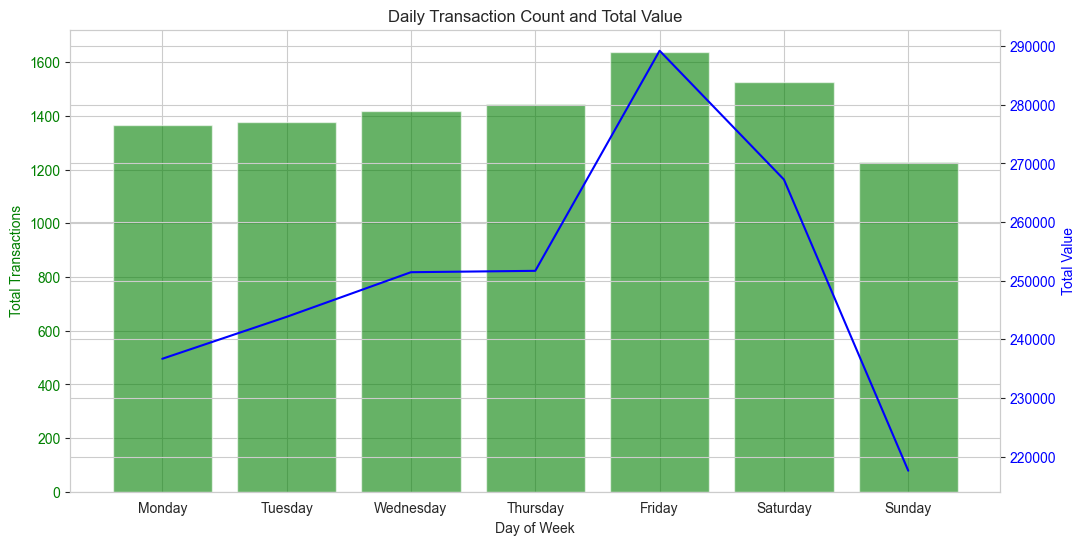

In [12]:
#7. Daily Transaction Count and Total Value
# Extract day of the week from 'CREATED_DATE'
data['day_of_week'] = data['CREATED_DATE'].dt.day_name()

# Order days of the week for plotting
order_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group by 'day_of_week' to get total number and value of transactions for each day
daily_summary = data.groupby('day_of_week').agg(
    total_transactions=('TRANSACTION_ID', 'count'),
    total_value=('AMOUNT', 'sum')
).reindex(order_days).reset_index()

# Plotting the daily transaction count and total value
fig, ax1 = plt.subplots(figsize=(12, 6))

# Twin the axes for two different y-axes
ax2 = ax1.twinx()

# Plotting the total transactions
ax1.bar(daily_summary['day_of_week'], daily_summary['total_transactions'], color='g', alpha=0.6)
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Total Transactions', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Plotting the total value
ax2.plot(daily_summary['day_of_week'], daily_summary['total_value'], 'b-')
ax2.set_ylabel('Total Value', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Setting the title and showing the plot
plt.title('Daily Transaction Count and Total Value')
pdf_pages.savefig() 
plt.show()

In [13]:
# Close the PDF
pdf_pages.close()